# BlackJack
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests
import json

In [2]:
file_to_load = "BlackJack.csv"

# Read Purchasing File and store into Pandas data frame
BlackJack = pd.read_csv(file_to_load)
df=pd.DataFrame(BlackJack)
df['FirstHand']=""
df['FirstHand'] = df['card1'] + df['card2']
df.head()


Unnamed: 0 PlayerNo  card1  card2  card3  card4  card5  sumofcards  \
0           0  Player1      7     10      0      0      0          17   
1           1  Player2     10      9      0      0      0          19   
2           2  Player3      9      8      0      0      0          17   
3           3  Player4      2     10      0      5      0          17   
4           4  Player5     10      2      0      5      0          17   

   dealcard1  dealcard2  ...  dealcard5  sumofdeal  blkjck  winloss  \
0         10          8  ...          0         18   nowin     Loss   
1         10          8  ...          0         18   nowin      Win   
2         10          8  ...          0         18   nowin     Loss   
3         10          8  ...          0         18   nowin     Loss   
4         10          8  ...          0         18   nowin     Loss   

  plybustbeat dlbustbeat plwinamt dlwinamt  ply2cardsum  FirstHand  
0        Beat      Dlwin        0       10           17         17  
1       Plwin       Beat       20        0           19         19  
2        Beat      Dlwin        0       10           17         17  
3        Beat      Dlwin        0       10           12         12  
4        Beat      Dlwin        0       10           12         12  

[5 rows x 22 columns]

In [3]:
df.describe()


Unnamed: 0          card1          card2          card3  \
count  900000.000000  900000.000000  900000.000000  900000.000000   
mean        2.500000       7.126259       7.089927       1.955088   
std         1.707826       2.994719       3.008032       3.531830   
min         0.000000       1.000000       1.000000       0.000000   
25%         1.000000       5.000000       4.000000       0.000000   
50%         2.500000       8.000000       8.000000       0.000000   
75%         4.000000      10.000000      10.000000       2.000000   
max         5.000000      11.000000      11.000000      11.000000   

               card4          card5     sumofcards      dealcard1  \
count  900000.000000  900000.000000  900000.000000  900000.000000   
mean        2.336462       0.389787      18.897522       7.170380   
std         3.657284       1.730740       3.210611       2.981575   
min         0.000000       0.000000       8.000000       1.000000   
25%         0.000000       0.000000      17.000000       5.000000   
50%         0.000000       0.000000      19.000000       8.000000   
75%         4.000000       0.000000      21.000000      10.000000   
max        10.000000      10.000000      26.000000      11.000000   

           dealcard2      dealcard3      dealcard4      dealcard5  \
count  900000.000000  900000.000000  900000.000000  900000.000000   
mean        7.129867       4.391293       1.380733       0.226433   
std         2.990306       4.080103       3.038298       1.334263   
min         1.000000       0.000000       0.000000       0.000000   
25%         5.000000       0.000000       0.000000       0.000000   
50%         8.000000       4.000000       0.000000       0.000000   
75%        10.000000       9.000000       0.000000       0.000000   
max        11.000000      11.000000      10.000000      10.000000   

           sumofdeal       plwinamt       dlwinamt    ply2cardsum  \
count  900000.000000  900000.000000  900000.000000  900000.000000   
mean       20.298707       9.723528       4.775789      14.216186   
std         2.556207       9.789798       4.994973       4.429873   
min         8.000000       0.000000       0.000000       2.000000   
25%        18.000000       0.000000       0.000000      12.000000   
50%        20.000000      10.000000       0.000000      14.000000   
75%        22.000000      20.000000      10.000000      18.000000   
max        26.000000      25.000000      10.000000      21.000000   

           FirstHand  
count  900000.000000  
mean       14.216186  
std         4.429873  
min         2.000000  
25%        12.000000  
50%        14.000000  
75%        18.000000  
max        21.000000

In [4]:
df.count()

Unnamed: 0     900000
PlayerNo       900000
card1          900000
card2          900000
card3          900000
card4          900000
card5          900000
sumofcards     900000
dealcard1      900000
dealcard2      900000
dealcard3      900000
dealcard4      900000
dealcard5      900000
sumofdeal      900000
blkjck         900000
winloss        900000
plybustbeat    900000
dlbustbeat     900000
plwinamt       900000
dlwinamt       900000
ply2cardsum    900000
FirstHand      900000
dtype: int64

In [7]:
df_count=(df["winloss"].count())
WinLoss=df.loc[:, ["winloss", "someofcards", "ply2cardsum"]]
WinLoss_count=WinLoss["winloss"].value_counts()
WinLoss_percentage=WinLoss_count/df_count * 100
WinLoss_percentage.head()

WinLoss_df=pd.DataFrame({"Win/Loss Percentage": WinLoss_percentage})
WinLoss_df=WinLoss_df["Win/Loss Percentage"].map("{:,.2f}%".format)
WinLoss_df.head()

Loss    47.76%
Win     42.88%
Push     9.36%
Name: Win/Loss Percentage, dtype: object

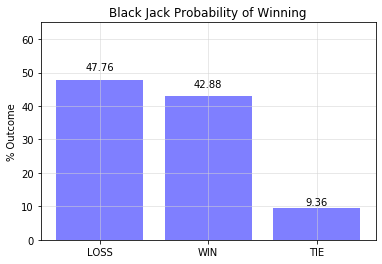

In [6]:
outcome=[47.76, 42.88, 9.36]
labels=["Test"]
x_axis=np.arange(len(outcome))
width=.5
#index=['LOSS', 'WIN', 'TIE']


fig, ax = plt.subplots()
bars=ax.bar(x_axis, outcome, color = 'b', alpha=.5, align="center")
ax.set_xticks(np.add(x_axis-0.5,width)) # set the position of the x ticks
ax.set_xticklabels(('LOSS', 'WIN', 'TIE'))
def autolabel(rects):
    # attach some text labels
    for rect in bars:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%0.02f'% float(height),ha='center', va='bottom')
autolabel(bars)

ax.set_ylim(0,65)
ax.set_ylabel('% Outcome')
ax.set_title('Black Jack Probability of Winning')
#ax.set_xticks(index + 0.0)
ax.set_autoscaley_on(False)

ax.grid(True, linewidth = .5, color = 'lightgrey')

plt.savefig('BlackJackWinning.png') 

plt.show()